In [127]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('apgar.csv')
df.dropna(inplace = True)

In [129]:
df['norm_birth'] = preprocessing.scale(df['bthwght'])
df = df.assign(apg8 = np.where(df['apgar5'] <= 8, 1,0))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [130]:
X = pd.DataFrame()
X['1-degree'] = df['norm_birth']
X['2-degree'] = X['1-degree']**2
X['3-degree'] = X['1-degree']**3
X['4-degree'] = X['1-degree']**4
X['5-degree'] = X['1-degree']**5
X['6-degree'] = X['1-degree']**6
X = X.assign(low = np.where(X['1-degree'] < -2, 1,0))
X = X.assign(high = np.where(X['1-degree'] > 2, 1,0))
X = sm.add_constant(X)
Y = df['apg8']
X['height'] = df['height']

In [131]:
model1 = sm.OLS(Y, X.iloc[:,0:2]).fit()
model2 = sm.OLS(Y, X.iloc[:,0:3]).fit()
model3 = sm.OLS(Y, X.iloc[:,0:4]).fit()
model4 = sm.OLS(Y, X.iloc[:,0:5]).fit()
model5 = sm.OLS(Y, X.iloc[:,0:6]).fit()
model6 = sm.OLS(Y, X.iloc[:,0:7]).fit()
model7 = sm.OLS(Y, X[['1-degree','2-degree','3-degree',\
                             '4-degree', '1-degree',\
                      'high','low','const']]).fit()
model8 = sm.OLS(Y, X[['const','1-degree','2-degree','3-degree',\
                     '4-degree','height']]).fit()


In [132]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [133]:
models = [model1,model2,model3,model4,model5,model6,model7, model8]
model_name =['model1','model2','model3','model4','model5','model6','model7','model8']


In [134]:
models = [model1,model2,model3,model4,\
          model5,model6,model7, model8]
model_name =['model1','model2','model3',\
             'model4','model5','model6','model7','model8']

model_rmse = []
for i, j in zip(models,model_name):
    model_rmse.append(rmse(i.predict(),Y))

    
    

In [135]:
model_rmse = list(zip(model_name, model_rmse))

In [136]:
rmses = pd.DataFrame(model_rmse, columns = {'model','rmse'})
rmses = rmses.set_index('model')




In [137]:
print(rmses.sort_values(by = 'rmse'))

            rmse
model           
model8  0.252436
model6  0.252445
model5  0.252445
model7  0.252445
model4  0.252447
model3  0.252464
model2  0.252490
model1  0.252585


Part B. 
We will now compare the models using an out-of-sample comparison based on 5-fold cross-validation. 

In [138]:
model = linear_model.LinearRegression()

# Generate cross-validated estimates for each input data point.
predicted1 = cross_val_predict(model,X.iloc[:,0:2], Y, cv = 5)
predicted2 = cross_val_predict(model,X.iloc[:,0:3], Y, cv = 5)
predicted3 = cross_val_predict(model,X.iloc[:,0:4], Y, cv = 5)
predicted4 = cross_val_predict(model,X.iloc[:,0:5], Y, cv = 5)
predicted5 = cross_val_predict(model,X.iloc[:,0:6], Y, cv = 5)
predicted6 = cross_val_predict(model,X.iloc[:,0:7], Y, cv = 5)
predicted7 = cross_val_predict(model,X[['1-degree',\
                                        '2-degree','3-degree',\
                                        '4-degree', '1-degree',\
                                        'high','low','const']], Y, cv = 5)
predicted8 = cross_val_predict(model,X[['const','1-degree',\
                                        '2-degree','3-degree',\
                                        '4-degree','height']], Y, cv = 5)




In [139]:
model_predict = [predicted1,predicted2,predicted3,predicted4,predicted5,predicted6,predicted7, predicted8]
model_name =['predicted1','predicted2','predicted3','predicted4','predicted5',\
             'predicted6','predicted7','predicted8']

model_rmse = []
for i, j in zip(model_predict,model_name):
    model_rmse.append(rmse(i,Y))
    
model_rmse = list(zip(model_name, model_rmse))
rmses = pd.DataFrame(model_rmse, columns = {'model','rmse'})
rmses = rmses.set_index('model')
print(rmses.sort_values(by = 'rmse'))

                rmse
model               
predicted8  0.252494
predicted4  0.252495
predicted5  0.252501
predicted3  0.252502
predicted7  0.252502
predicted6  0.252505
predicted2  0.252524
predicted1  0.252595


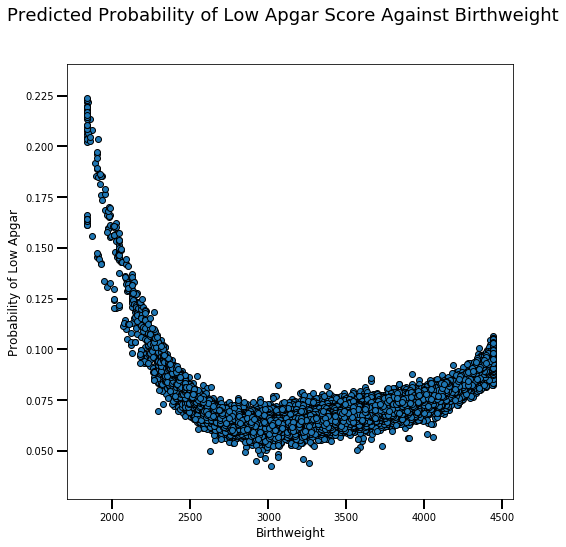

In [140]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df['bthwght'], predicted8, edgecolors = (0,0,0))
fig.suptitle('Predicted Probability of Low Apgar Score Against Birthweight', fontsize=18)
ax.set_xlabel("Birthweight",fontsize=12)
ax.set_ylabel("Probability of Low Apgar",fontsize=12)
ax.tick_params(direction='out', length=10, width=2, grid_alpha=0.5,labelsize = 10)
plt.show()